In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import Huber

In [2]:
df = pd.read_csv(r"C:\Users\prajwal\Downloads\laptop_price.csv", encoding='latin1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

print(df['Weight'].head())

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64


In [5]:
df.drop(['laptop_ID'], inplace = True, axis = 1)

In [6]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [7]:
df['Price_euros'].corr(df['Inches'])

0.06819666592963959

In [8]:
df['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [9]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), object(9)
memory usage: 122.3+ KB


In [11]:
import seaborn as sns

<Axes: xlabel='Price_euros', ylabel='Inches'>

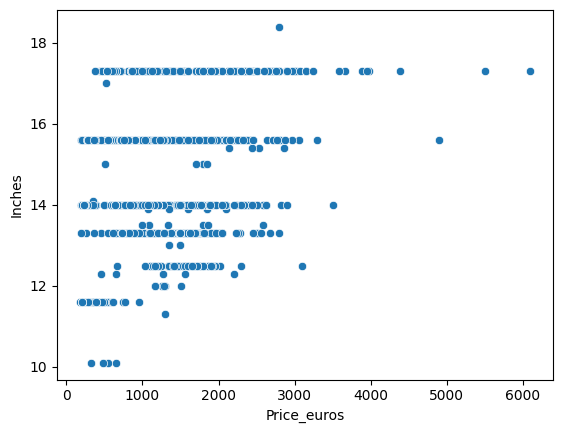

In [12]:
sns.scatterplot(x = df['Price_euros'], y = df['Inches'])

In [13]:
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']

# Apply one-hot encoding to all categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame
print(df_encoded)

      Inches  Weight  Price_euros  Company_Acer  Company_Apple  Company_Asus  \
0       13.3    1.37      1339.69         False           True         False   
1       13.3    1.34       898.94         False           True         False   
2       15.6    1.86       575.00         False          False         False   
3       15.4    1.83      2537.45         False           True         False   
4       13.3    1.37      1803.60         False           True         False   
...      ...     ...          ...           ...            ...           ...   
1298    14.0    1.80       638.00         False          False         False   
1299    13.3    1.30      1499.00         False          False         False   
1300    14.0    1.50       229.00         False          False         False   
1301    15.6    2.19       764.00         False          False         False   
1302    15.6    2.20       369.00         False          False          True   

      Company_Chuwi  Company_Dell  Comp

In [14]:
df_encoded = df_encoded.replace({False: 0, True: 1})

df_encoded.head()

C:\Users\prajwal\AppData\Local\Temp\ipykernel_17956\3029504890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df_encoded.replace({False: 0, True: 1})


,Inches,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,1.37,1339.69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13.3,1.34,898.94,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.6,1.86,575.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15.4,1.83,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.3,1.37,1803.60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X = df_encoded.iloc[:,0:-1]
y = df_encoded.iloc[:,-1]

In [16]:
X

,Inches,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7
0,13.3,1.37,1339.69,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.3,1.34,898.94,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15.6,1.86,575.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15.4,1.83,2537.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13.3,1.37,1803.60,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1.80,638.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1299,13.3,1.30,1499.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1300,14.0,1.50,229.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1301,15.6,2.19,764.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
y

0       1
1       1
2       0
3       1
4       1
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: OpSys_macOS, Length: 1303, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [19]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(1042, 970) (261, 970) (1042,) (261,)


In [20]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(970,)))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1, activation='linear'))

C:\Users\prajwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         124,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,729 (522.38 KB)

 Trainable params: 133,729 (522.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# model.compile(optimizer = 'adam', loss='huber', metrics=['accuracy'])
model.compile(optimizer = 'adam', loss='huber', metrics=['mae'])

In [23]:
# history = model.fit(train_X, train_y, epochs = 20, validation_split = 0.2)
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(train_X, train_y, epochs=200, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 51.0949 - mae: 51.5257 - val_loss: 3.9909 - val_mae: 4.4908
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.3693 - mae: 9.7439 - val_loss: 0.1303 - val_mae: 0.4204
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6048 - mae: 3.9172 - val_loss: 0.0193 - val_mae: 0.1379
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4024 - mae: 2.6447 - val_loss: 0.0051 - val_mae: 0.0733
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6264 - mae: 1.8318 - val_loss: 0.0054 - val_mae: 0.0781
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2437 - mae: 1.4334 - val_loss: 0.0056 - val_mae: 0.0809
Epoch 7/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9814 - mae: 1.1397 - val_loss: 0.0055 - val_mae: 0.0797
Epoch 8/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7490 - mae: 0.8981 - val_loss: 0.0055 - val_mae: 0.0789
Epoch 9/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [24]:
y_pred = model.predict(test_X)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [25]:
# accuracy, loss = model.evaluate(test_X, test_y)
loss, mae = model.evaluate(test_X, test_y)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0118 - mae: 0.0852 


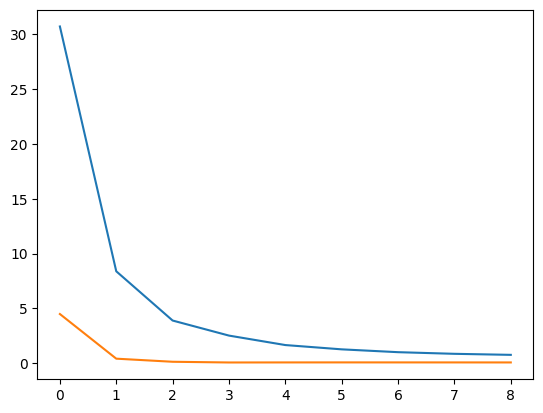

In [26]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])